## Google Developers Student Clubs, Silicon Chapter

<h1><center>Regression Analysis on "Housing/Property Price Prediction"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [4]:
# Loading the DataSet

df = pd.read_csv('Housing.csv')

In [5]:
# Finding the information about the dataset.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
# Statistical description of the dataset.

df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
# Checking if the dataset contains any null valued entries in their columns/attributes.

display(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [8]:
# Checking if the dataset contains any NA valued entries in their columns/attributes.

display(df.isna().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [9]:
display(df.head()) #.head(n) function shows the top n number of rows present in the dataset.

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [10]:
new_df = df

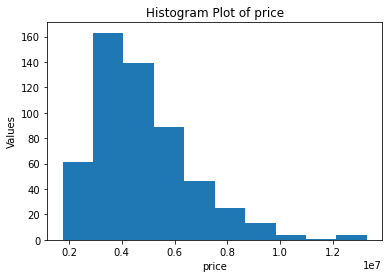

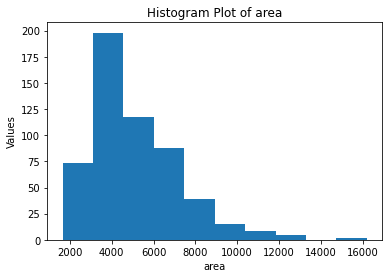

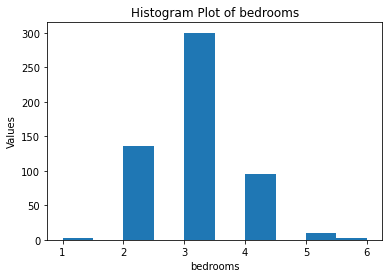

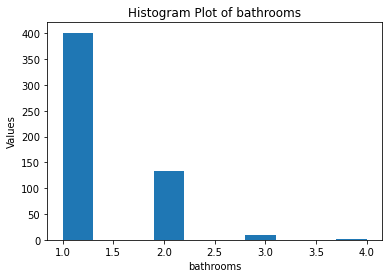

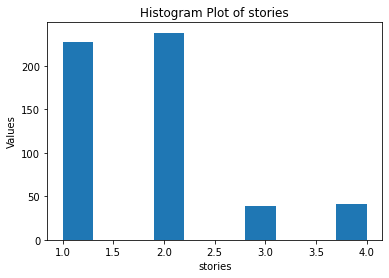

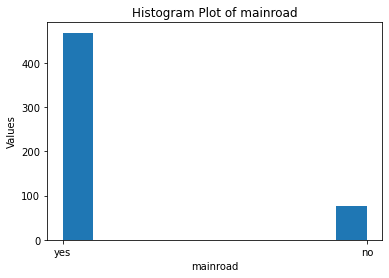

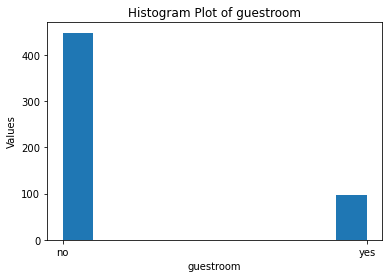

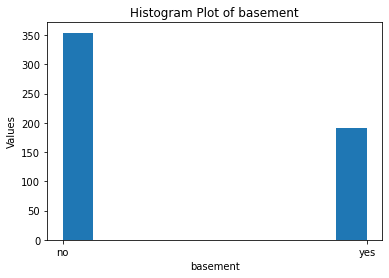

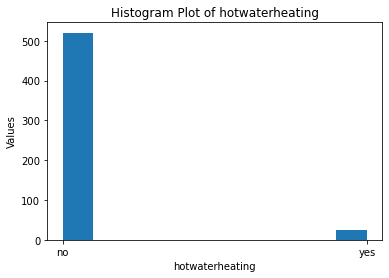

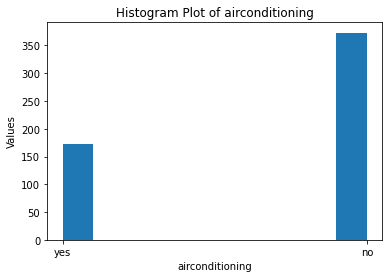

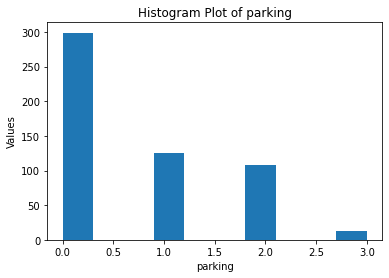

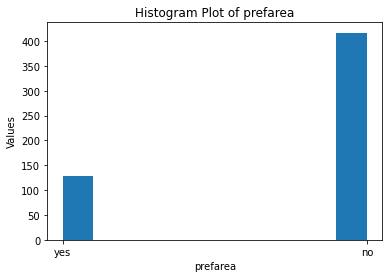

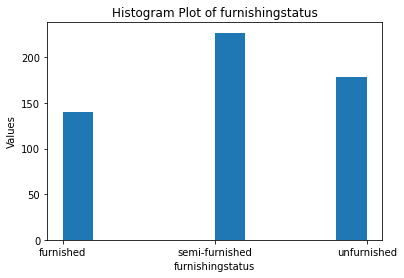

In [11]:
# Histogram plots for the columns for visualisations.

for col in new_df.columns:
    plt.figure()
    plt.hist(df[col])
    plt.title("Histogram Plot of "+col)
    plt.xlabel(col)
    plt.ylabel("Values")
plt.show()

<h3>We need to encode the values present as catagories or string. Because our model makes a mathematical solution and we require to set that.

In [12]:
from sklearn.preprocessing import LabelEncoder # THis library is used to encode the dataset

label_encoder = LabelEncoder()

categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning','prefarea','furnishingstatus']

for col in categorical_cols:
    new_df[col + '_encoded'] = label_encoder.fit_transform(new_df[col])

In [13]:
# Display the encoded DataFrame

display(new_df)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,mainroad_encoded,guestroom_encoded,basement_encoded,hotwaterheating_encoded,airconditioning_encoded,prefarea_encoded,furnishingstatus_encoded
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,1,0,0,0,1,1,0
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,1,0,0,0,1,0,0
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,1,0,1,0,0,1,1
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,1,0,1,0,1,1,0
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,1,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,1,0,1,0,0,0,2
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,1,0,0,0,0,0,2
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished,0,0,0,0,0,0,0


In [14]:
# Since after encoding we dont require the original cols.

encoded_dropped = new_df.drop(columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning','prefarea','furnishingstatus']
)
print(encoded_dropped)

        price  area  bedrooms  bathrooms  stories  parking  mainroad_encoded  \
0    13300000  7420         4          2        3        2                 1   
1    12250000  8960         4          4        4        3                 1   
2    12250000  9960         3          2        2        2                 1   
3    12215000  7500         4          2        2        3                 1   
4    11410000  7420         4          1        2        2                 1   
..        ...   ...       ...        ...      ...      ...               ...   
540   1820000  3000         2          1        1        2                 1   
541   1767150  2400         3          1        1        0                 0   
542   1750000  3620         2          1        1        0                 1   
543   1750000  2910         3          1        1        0                 0   
544   1750000  3850         3          1        2        0                 1   

     guestroom_encoded  basement_encode

In [15]:
# Data Splitting.

from sklearn.model_selection import train_test_split

X = encoded_dropped.drop(columns=['price'])
y = encoded_dropped['price']

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state =50)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

linear_model = LinearRegression()
linear_model = linear_model.fit(X_train,y_train)

y_pred = linear_model.predict(X_test)

print(f"R^2 Score:- {r2_score(y_test, y_pred)}\n")
print(f"The Mean Absolute Error : {mean_absolute_error(y_test, y_pred)}\n")

R^2 Score:- 0.6907993785085313

The Mean Absolute Error : 806187.4077939554



In [18]:
percent_error = sklearn.metrics.mean_absolute_percentage_error(y_test, y_pred)
print(percent_error)

print(f"Accuracy is {(1-percent_error)*100}%")

0.18319173100181033
Accuracy is 81.68082689981897%


In [20]:
print("Lets Predict Now : ")

# Taking inputs for the prediction.
area = int(input("Enter the area : "))
bedrooms = int(input("Enter the number of bedrooms : "))
bathrooms = int(input("Enter the number of bathrooms : "))
stories = int(input("Enter the number of stories/level of house : "))
parking = int(input("Enter whether parking present or not (0/1) : "))
mainroad = int(input("Enter whether mainroad is present or not (0/1) : "))
guestroom = int(input("Enter whether guestroom is present or not (0/1) : "))
basement = int(input("Enter whether basement is present or not (0/1) : "))
hotwater = int(input("Enter whether hotwater is present or not (0/1) : "))
ac = int(input("Enter whether airconditioning is present or not (0/1) : "))
pref = int(input("Enter whether the house is present in preferred area or not (0/1) : "))
f_stat = int(input("Enter whether house is furnished/semi/non furnished(0/1/2) : "))

inp = [[area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwater,ac,pref,f_stat]]

price_pred = linear_model.predict(inp)

print("Price: ",price_pred)

Lets Predict Now : 
Enter the area : 100000
Enter the number of bedrooms : 5
Enter the number of bathrooms : 2
Enter the number of stories/level of house : 5
Enter whether parking present or not (0/1) : 1
Enter whether mainroad is present or not (0/1) : 1
Enter whether guestroom is present or not (0/1) : 0
Enter whether basement is present or not (0/1) : 1
Enter whether hotwater is present or not (0/1) : 0
Enter whether airconditioning is present or not (0/1) : 1
Enter whether the house is present in preferred area or not (0/1) : 1
Enter whether house is furnished/semi/non furnished(0/1/2) : 1
Price:  [29838872.11067651]


C:\Users\HARIPRIYA\Documents\JUPITER\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
